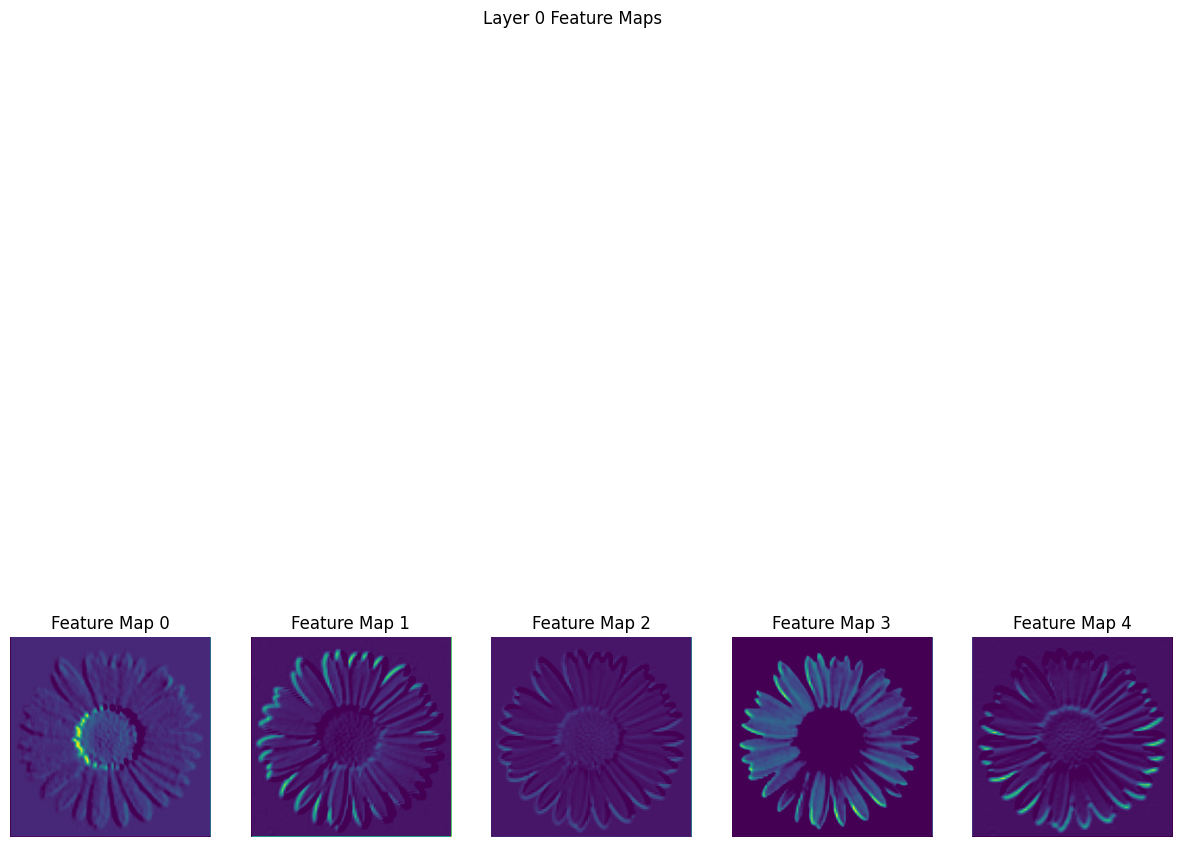

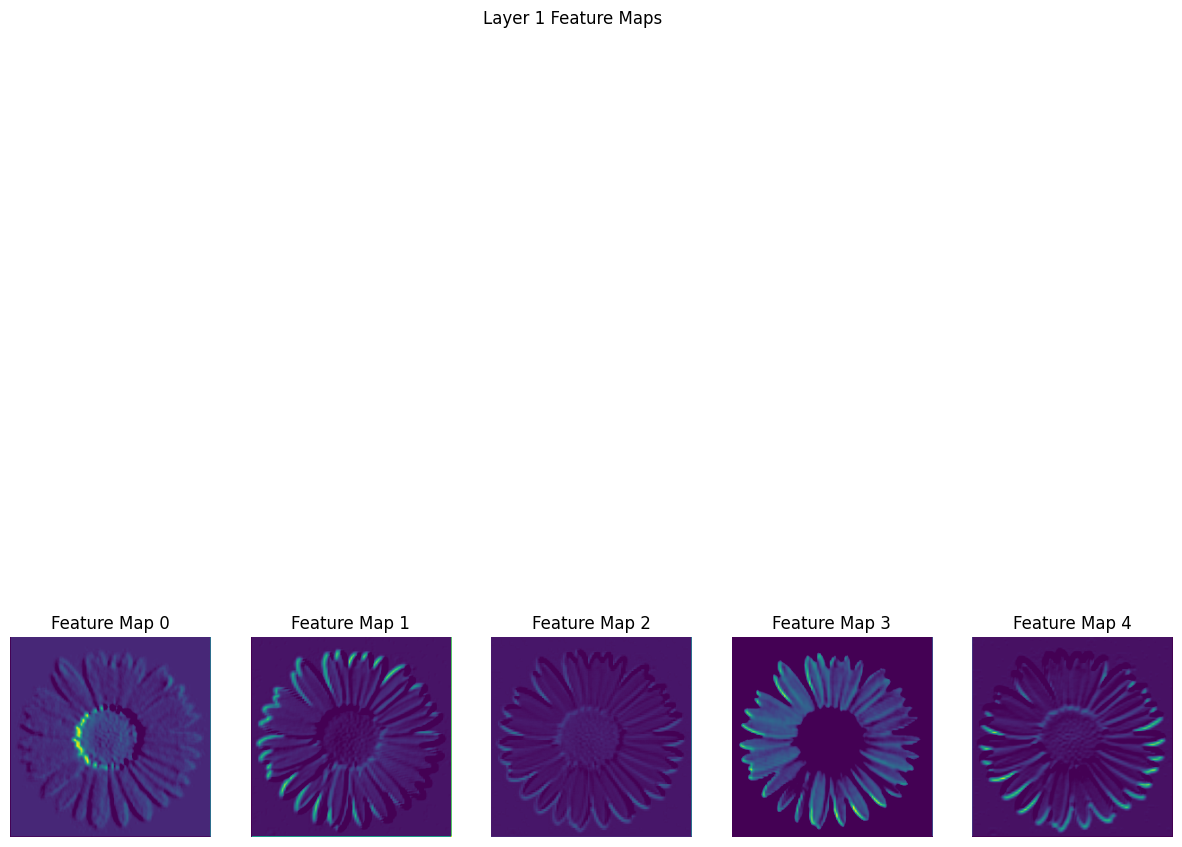

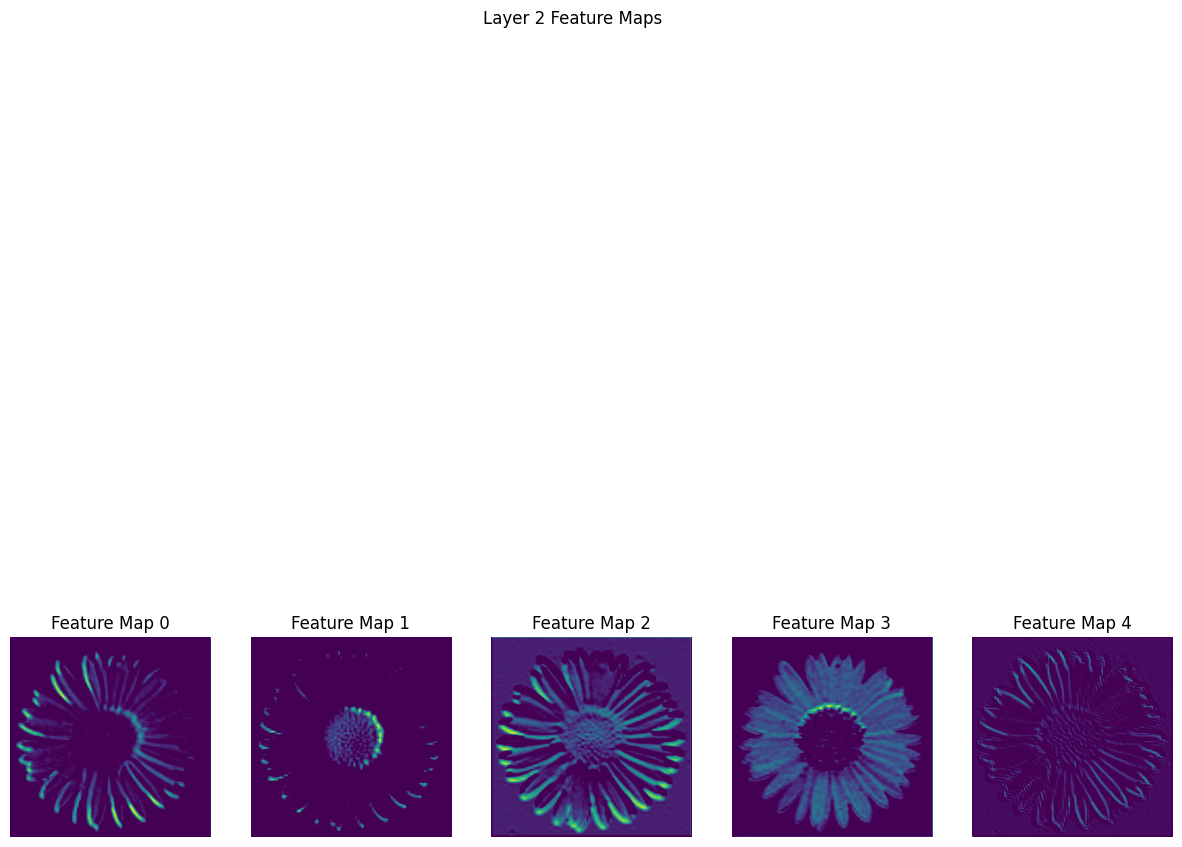

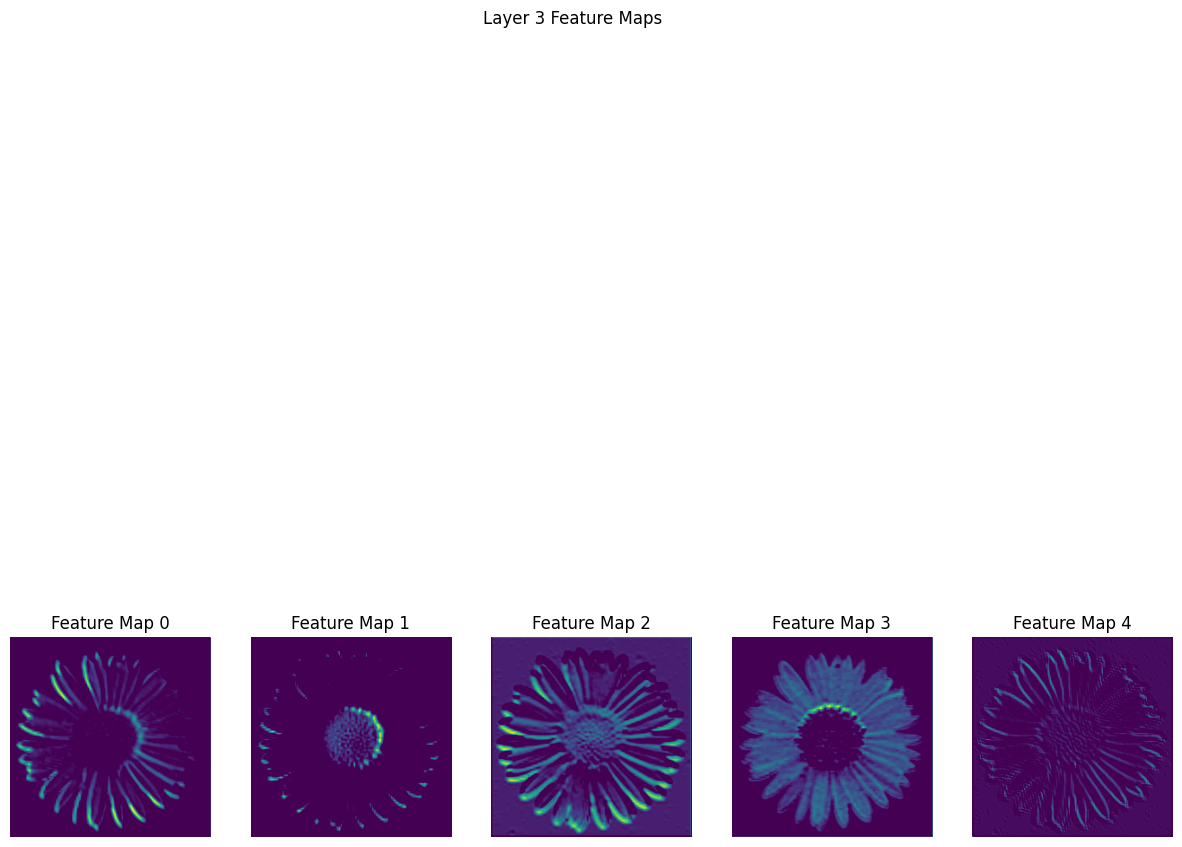

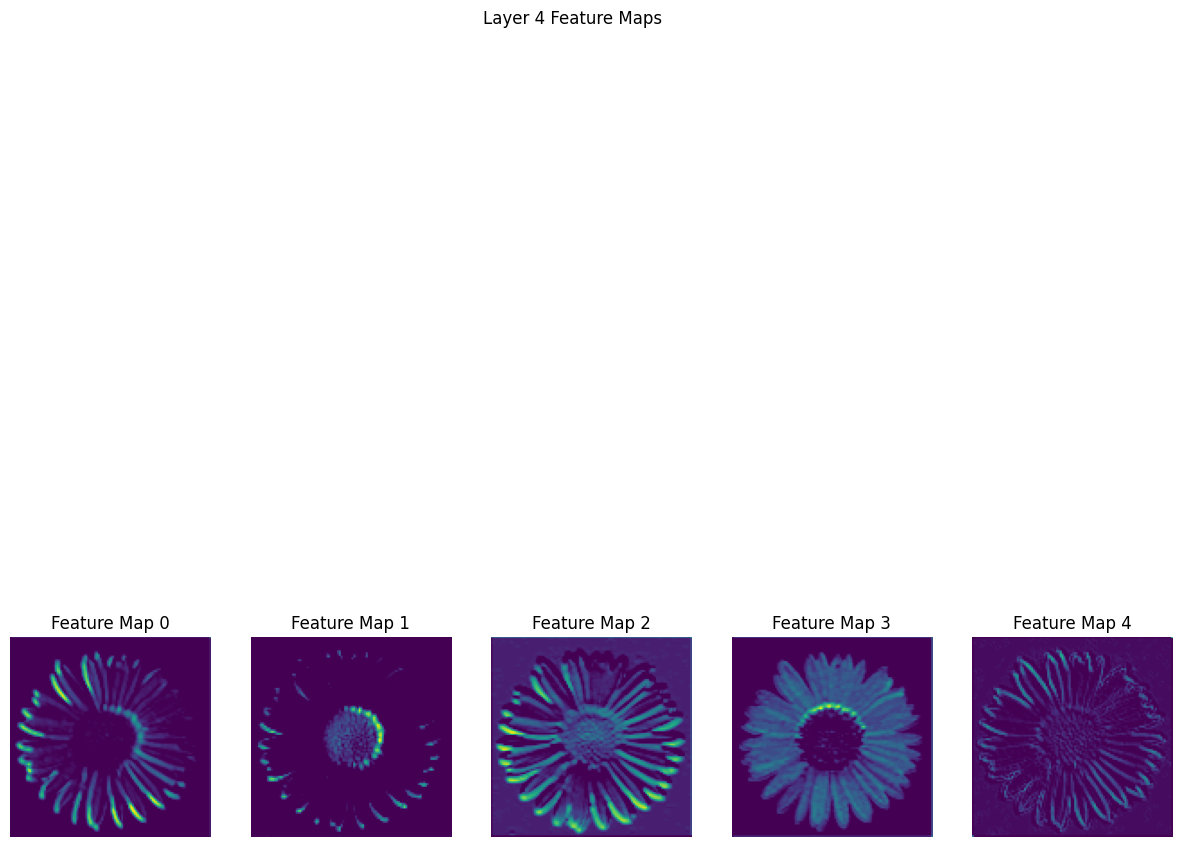

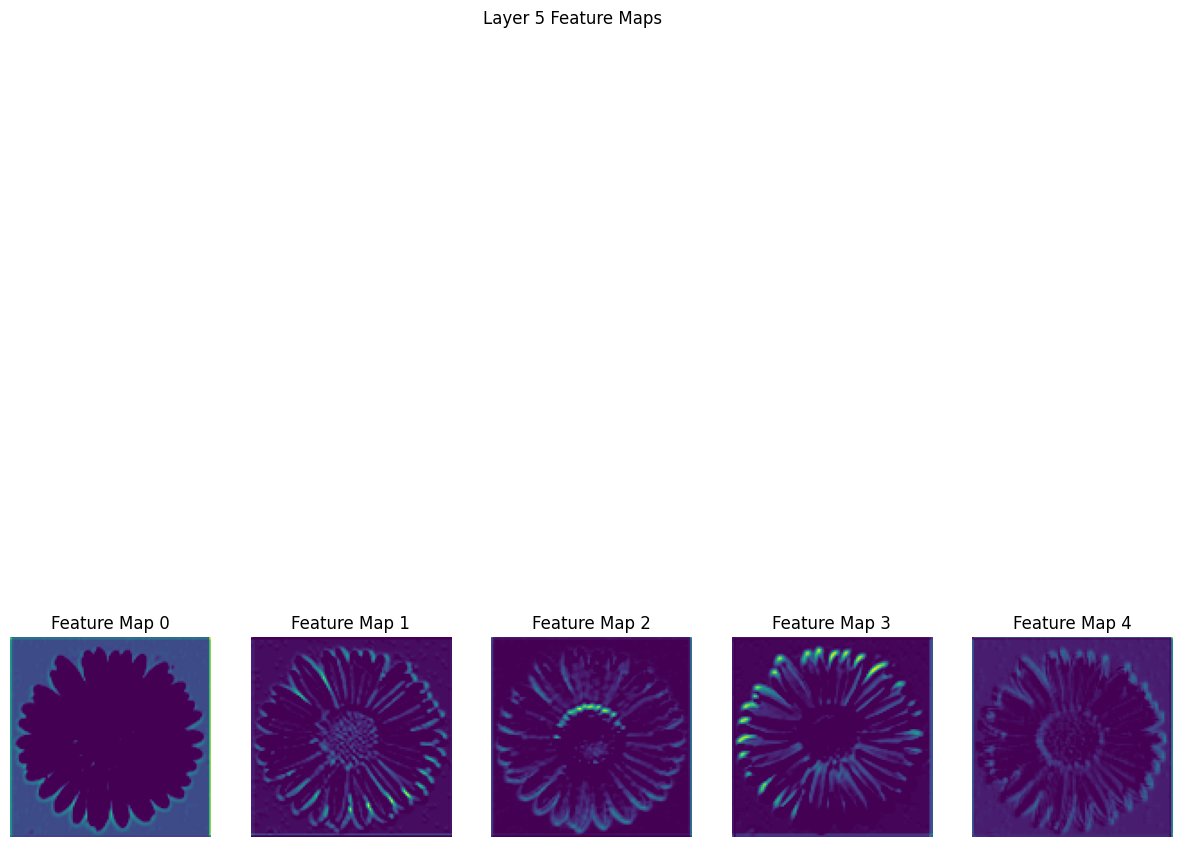

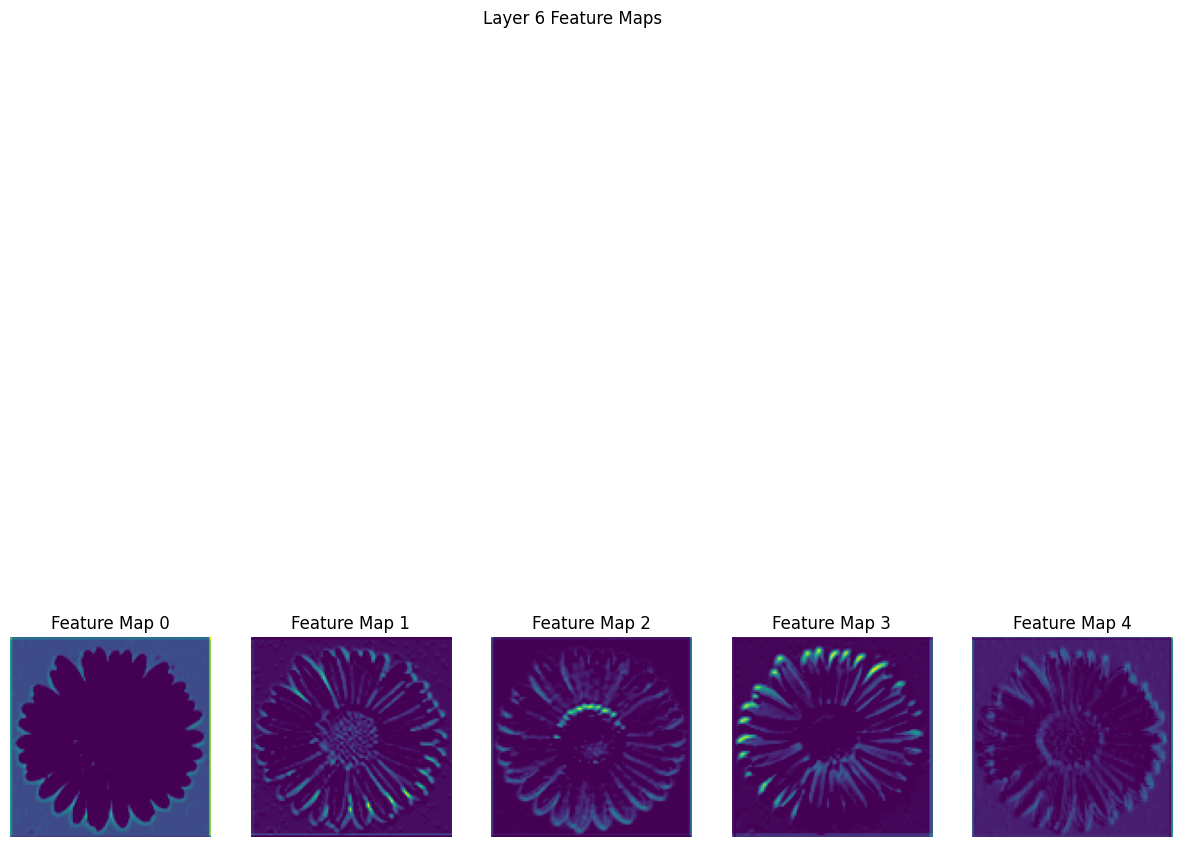

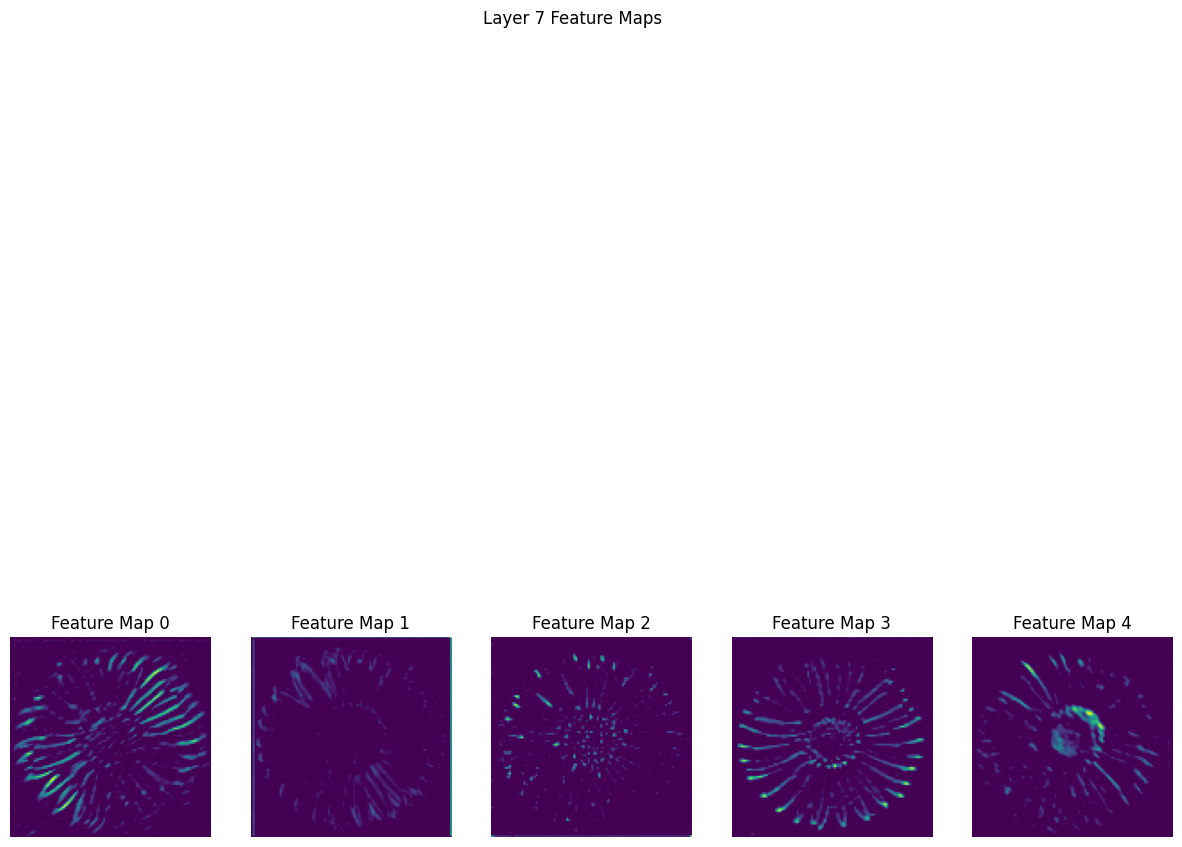

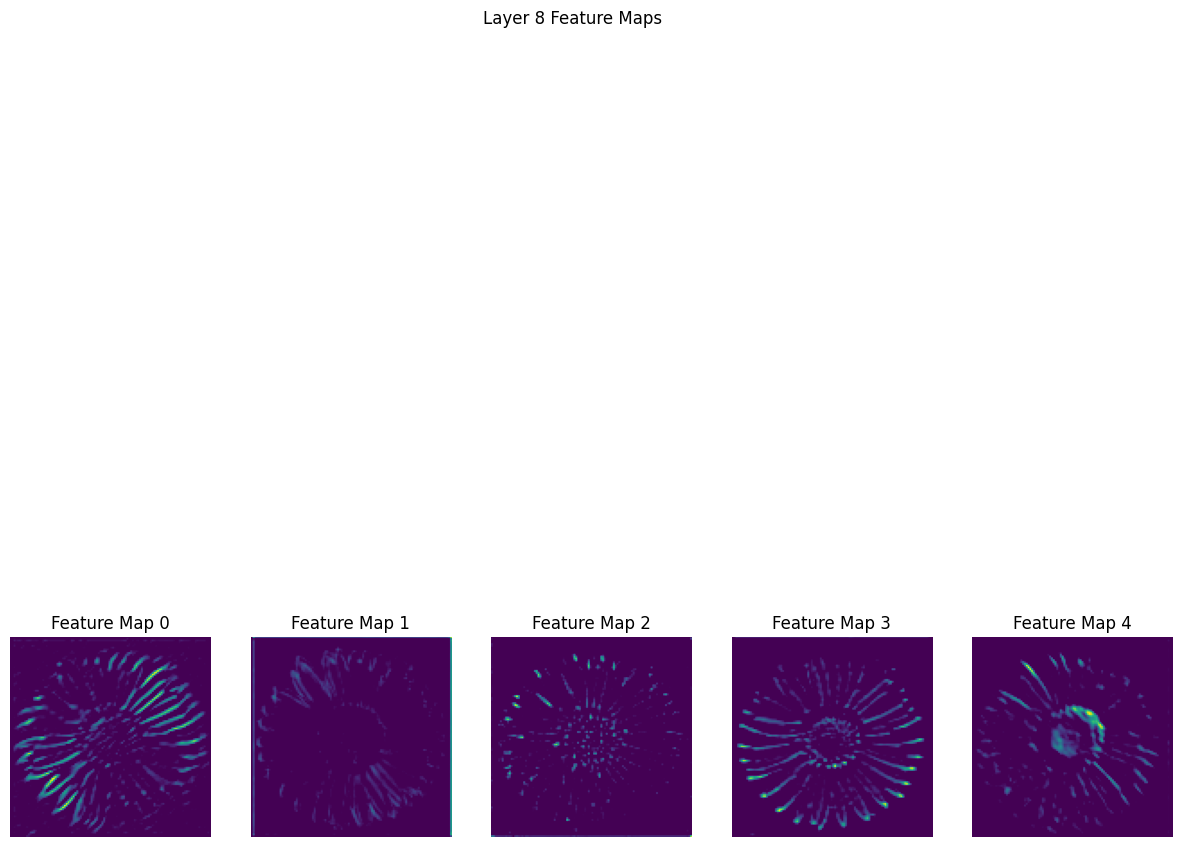

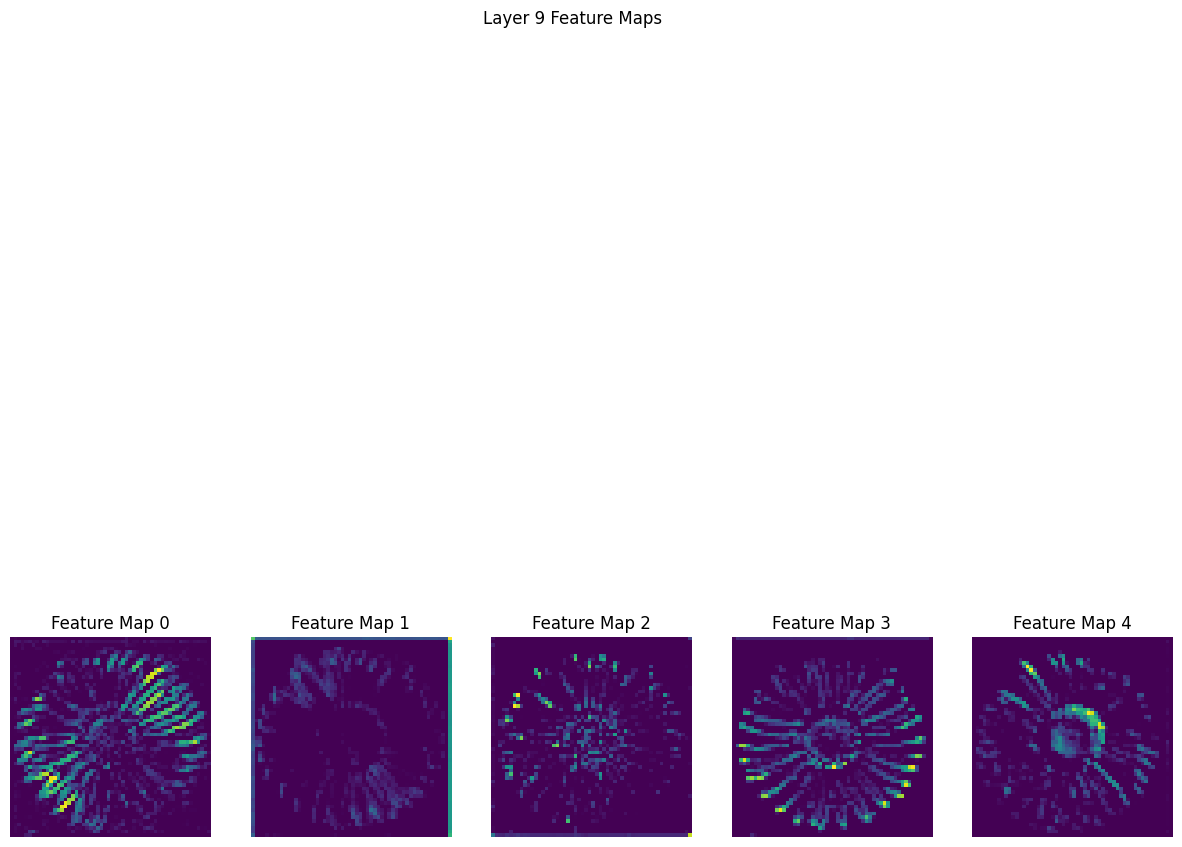

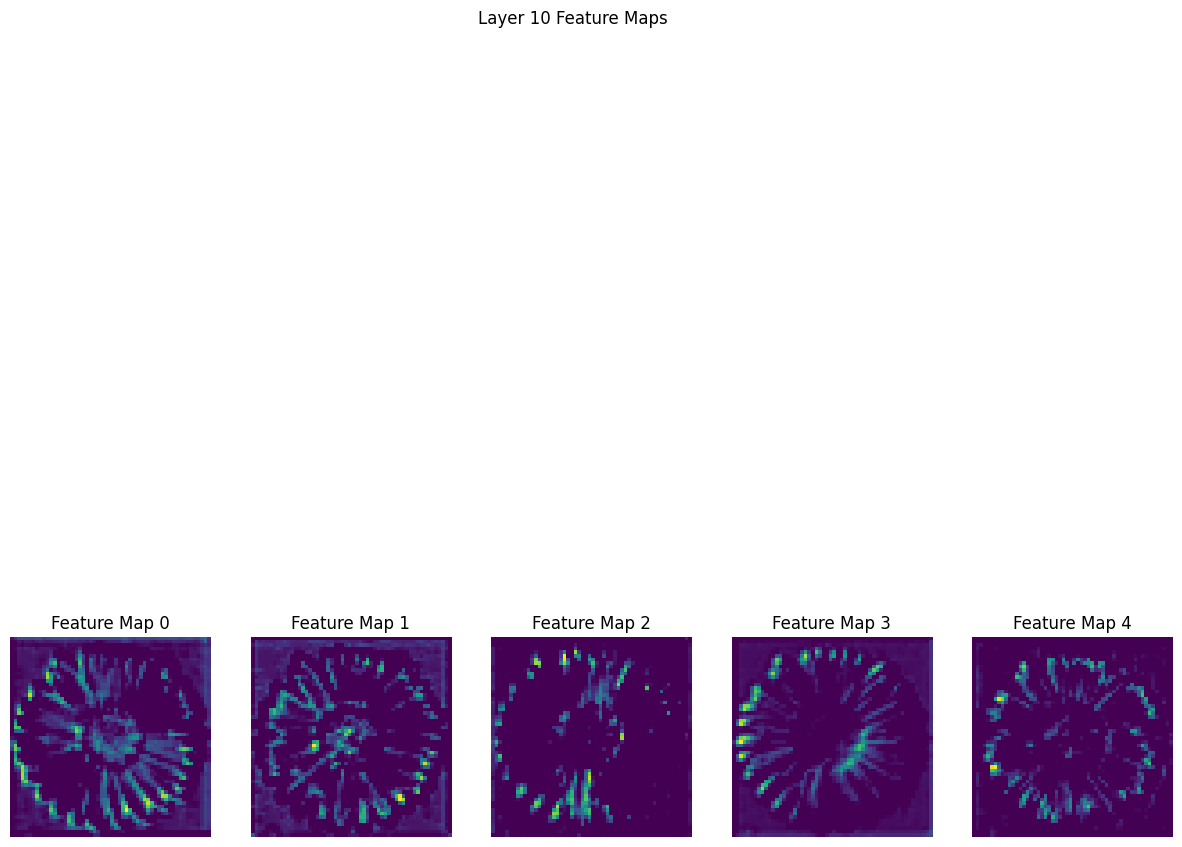

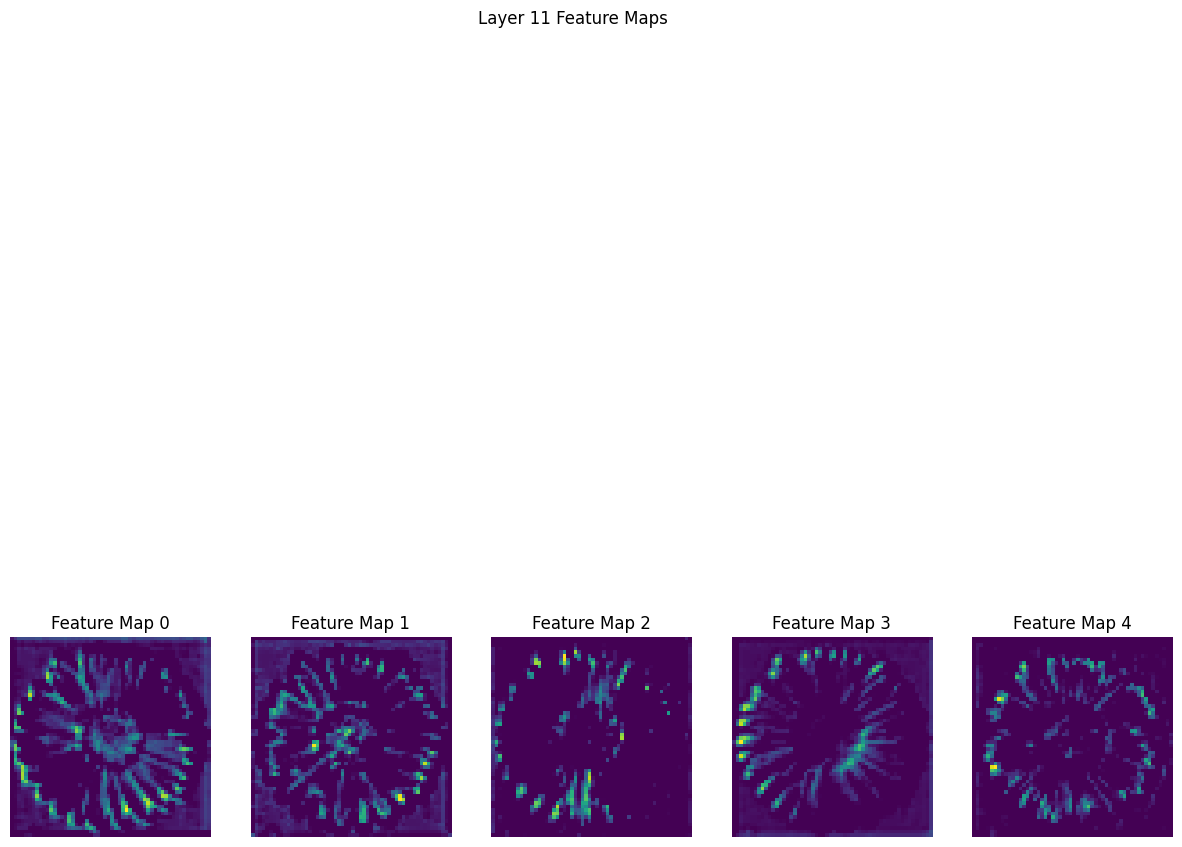

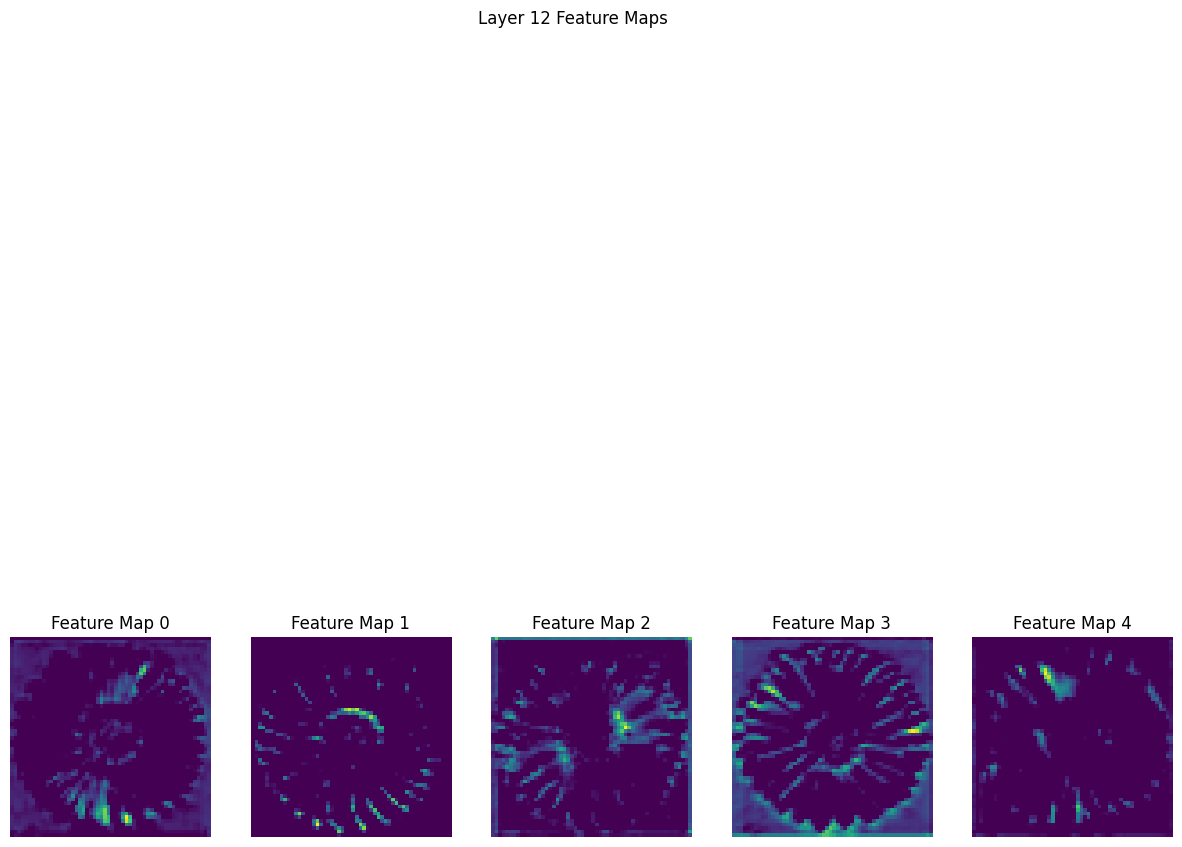

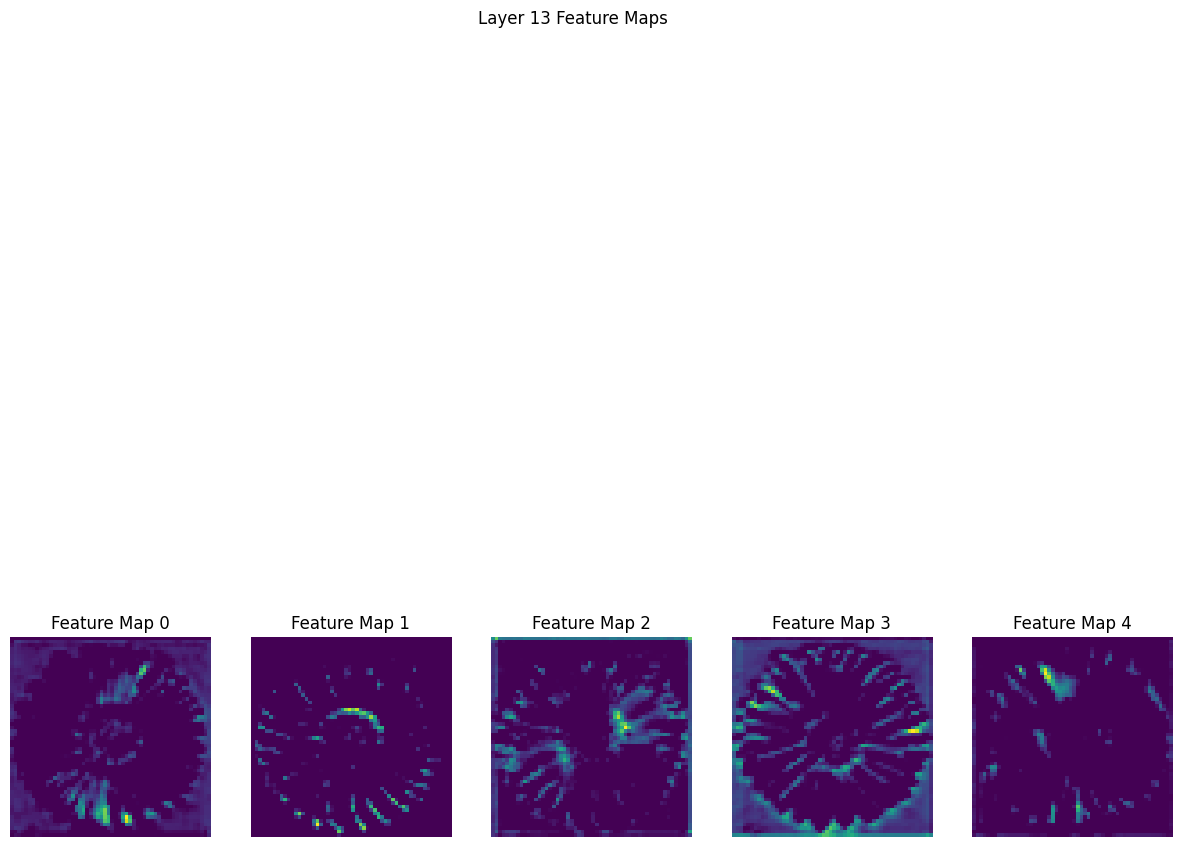

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load a pre-trained model
model = models.vgg16(pretrained=True)

# Set the model to evaluation mode
model.eval()

# Define the image transformations
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load an image and preprocess it
image_path = "Picture2.png"
input_image = Image.open(image_path).convert('RGB')
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)  # Create a mini-batch

# Dictionary to store the activations
activations = {}

# Function to register hooks to each layer
def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

# Register hooks to all layers in the model's features (convolutional layers)
for idx, layer in enumerate(model.features):
    layer.register_forward_hook(get_activation(f"layer_{idx}"))

# Run the model on the input image
with torch.no_grad():
    output = model(input_batch)

# Function to plot the activation maps
def plot_activations(layer_activations, layer_num):
    # Number of feature maps to display per layer
    num_feature_maps = min(5, layer_activations.shape[0])

    fig, axes = plt.subplots(1, num_feature_maps, figsize=(15, 15))
    for i in range(num_feature_maps):
        axes[i].imshow(layer_activations[i].cpu(), cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f'Feature Map {i}')
    plt.suptitle(f'Layer {layer_num} Feature Maps')
    plt.show()

# Plot 5 feature maps for each layer
for layer_name, act in activations.items():
    layer_num = int(layer_name.split('_')[1])  # Extract the layer number
    act_squeezed = act.squeeze()  # Remove batch dimension
    plot_activations(act_squeezed, layer_num)
